In [101]:
# Creating Dynamic Pricing Dataset
import random
import csv
from datetime import datetime, timedelta

def generate_electricity_prices(num_hours, upper_limit, lower_limit):
    prices = [round(random.uniform(lower_limit, upper_limit), 2) for _ in range(num_hours)]
    return prices

upper_limit = 25
lower_limit = 20
num_hours = 24

dataset = []
start_time = datetime.strptime('00:00', '%H:%M')

for _ in range(2):
    electricity_prices = generate_electricity_prices(num_hours, upper_limit, lower_limit)
    for hour, price in enumerate(electricity_prices):
        time = (start_time + timedelta(hours=hour)).strftime('%H:%M')
        dataset.append([time, price])

with open('electricity_prices.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Price'])
    writer.writerows(dataset)


In [102]:
def generate_tank_levels(num_hours, highest_level, lowest_level):
    levels = [round(highest_level - (i * ((highest_level - lowest_level) / num_hours)), 2) for i in range(num_hours)]
    return levels

highest_level = 100.0 
lowest_level = 0.0 

tank_levels_dataset = []
for _ in range(2):
    tank_levels = generate_tank_levels(num_hours, highest_level, lowest_level)
    tank_levels_dataset.append(tank_levels)

for day, levels in enumerate(tank_levels_dataset):
    print(f'Day {day + 1}:')
    for hour, level in enumerate(levels):
        print(f'Hour {hour + 1}: {level}%')


Day 1:
Hour 1: 100.0%
Hour 2: 95.83%
Hour 3: 91.67%
Hour 4: 87.5%
Hour 5: 83.33%
Hour 6: 79.17%
Hour 7: 75.0%
Hour 8: 70.83%
Hour 9: 66.67%
Hour 10: 62.5%
Hour 11: 58.33%
Hour 12: 54.17%
Hour 13: 50.0%
Hour 14: 45.83%
Hour 15: 41.67%
Hour 16: 37.5%
Hour 17: 33.33%
Hour 18: 29.17%
Hour 19: 25.0%
Hour 20: 20.83%
Hour 21: 16.67%
Hour 22: 12.5%
Hour 23: 8.33%
Hour 24: 4.17%
Day 2:
Hour 1: 100.0%
Hour 2: 95.83%
Hour 3: 91.67%
Hour 4: 87.5%
Hour 5: 83.33%
Hour 6: 79.17%
Hour 7: 75.0%
Hour 8: 70.83%
Hour 9: 66.67%
Hour 10: 62.5%
Hour 11: 58.33%
Hour 12: 54.17%
Hour 13: 50.0%
Hour 14: 45.83%
Hour 15: 41.67%
Hour 16: 37.5%
Hour 17: 33.33%
Hour 18: 29.17%
Hour 19: 25.0%
Hour 20: 20.83%
Hour 21: 16.67%
Hour 22: 12.5%
Hour 23: 8.33%
Hour 24: 4.17%


In [103]:
import csv
from datetime import datetime, timedelta
import random

def generate_tank_levels(num_hours, highest_level, lowest_level):
    levels = [round(random.uniform(lowest_level, highest_level), 2) for _ in range(num_hours)]
    return levels

highest_level = 100.0 
lowest_level = 0.0 
num_hours = 24
num_days = 365

tank_levels_dataset = []

for day in range(1, num_days+1):
    tank_levels = generate_tank_levels(num_hours, highest_level, lowest_level)
    for hour, level in enumerate(tank_levels):
        current_time = (datetime.strptime('00:00', '%H:%M') + timedelta(hours=hour)).strftime('%H:%M')
        tank_levels_dataset.append([day, current_time, level])
    tank_levels_dataset.append([day, '00:00', 100.0])

with open('tank_levels_365_days.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Day', 'Time', 'Level'])
    writer.writerows(tank_levels_dataset)


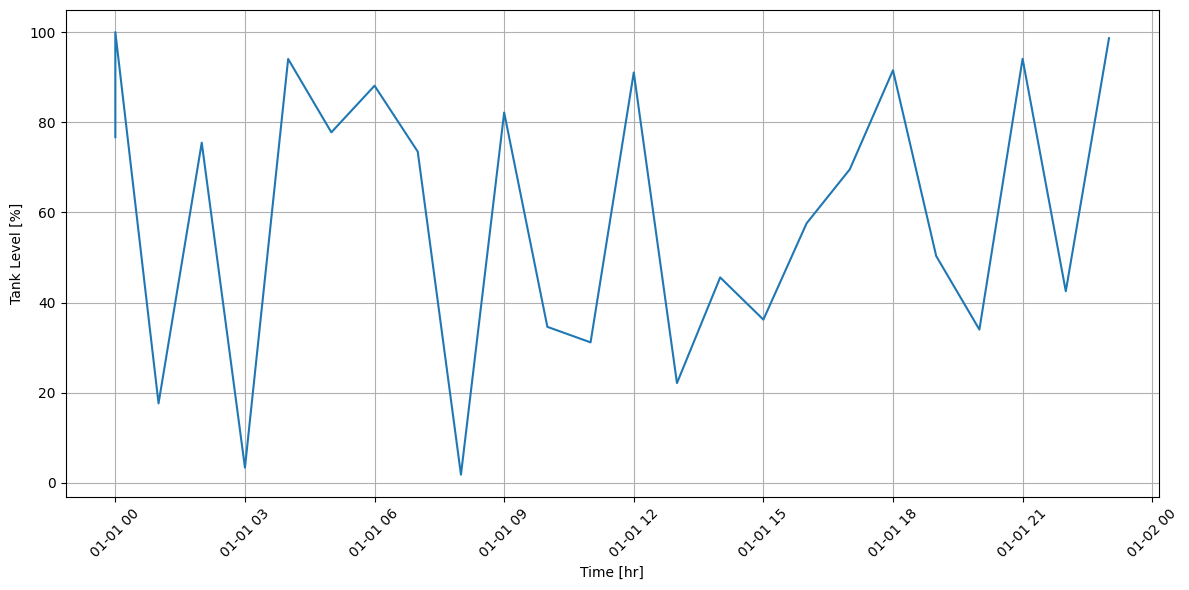

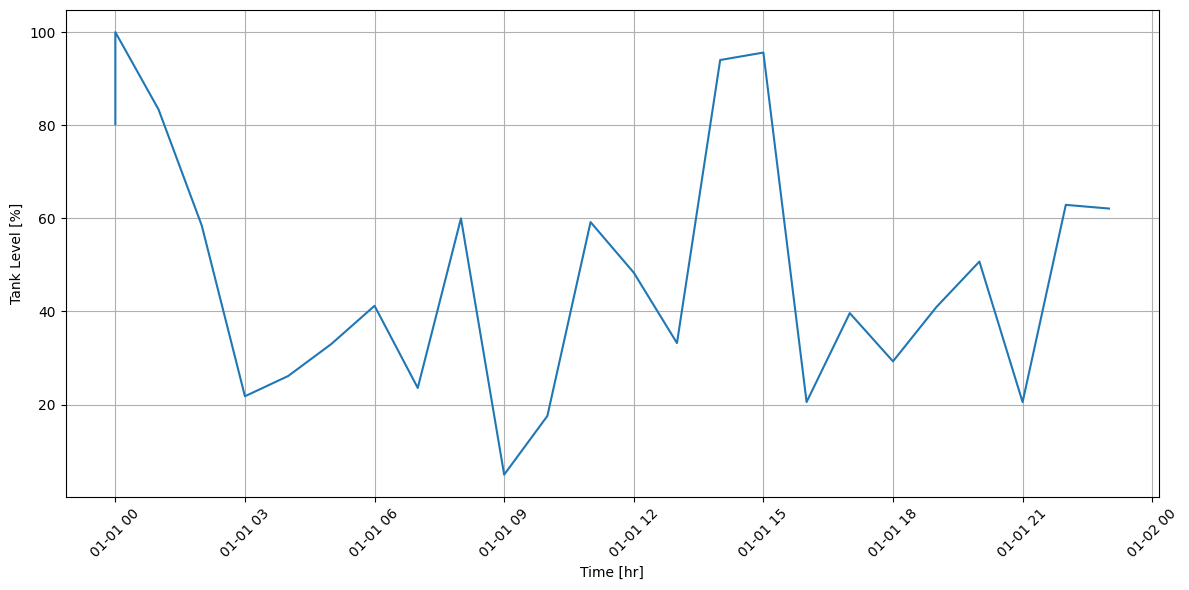

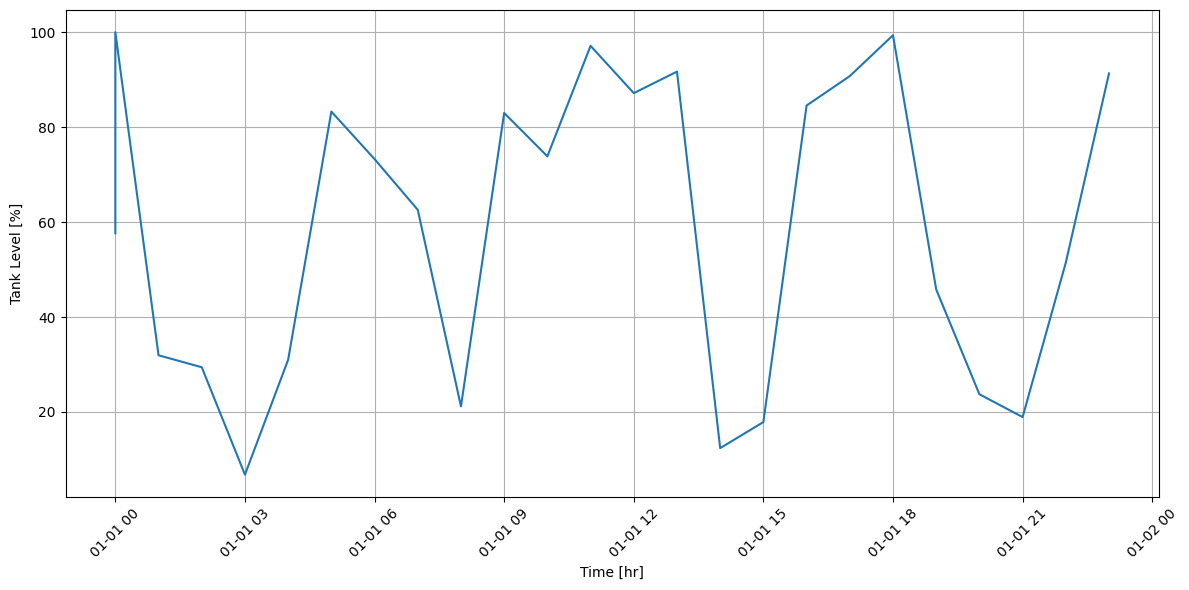

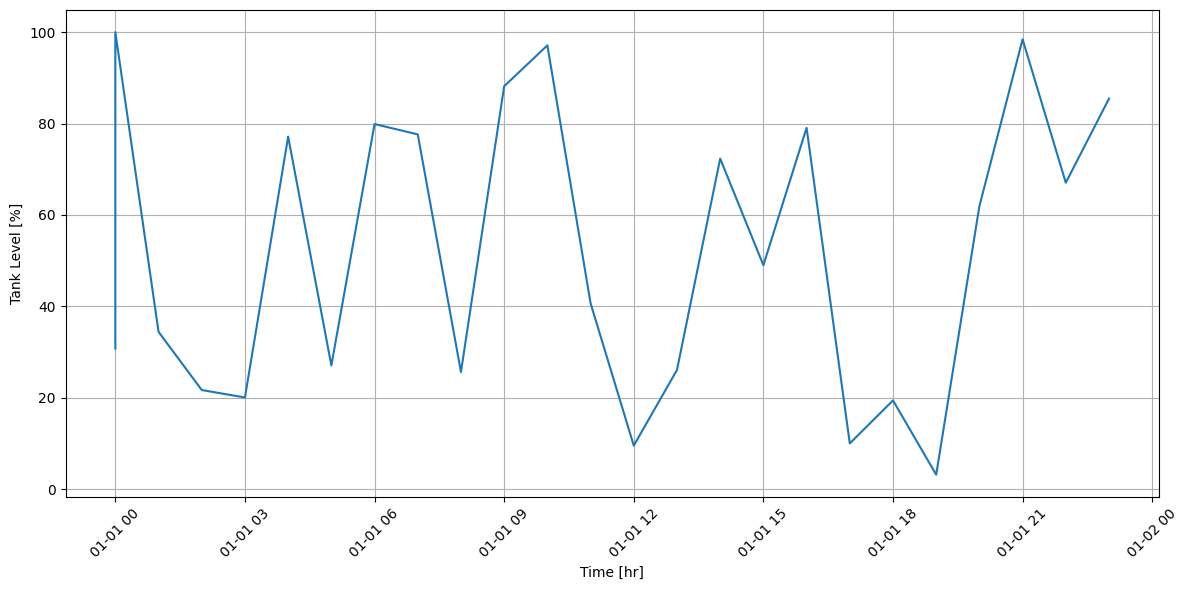

In [3]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

tank_levels_data = []

with open('tank_levels_365_days.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        tank_levels_data.append(row)

for record in tank_levels_data:
    record['Level'] = float(record['Level'])
    record['Time'] = datetime.strptime(record['Time'], '%H:%M')

day_data = {}

for record in tank_levels_data:
    day = int(record['Day'])
    if day not in day_data:
        day_data[day] = {'Time': [], 'Level': []}
    day_data[day]['Time'].append(record['Time'])
    day_data[day]['Level'].append(record['Level'])

for day in range(1, 5):
    data = day_data[day]
    data_sorted = sorted(zip(data['Time'], data['Level']))
    times, levels = zip(*data_sorted)

    plt.figure(figsize=(12, 6))
    plt.plot(times, levels)
    plt.xlabel('Time')
    plt.ylabel('Tank Level [%]')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [105]:
import csv
from datetime import datetime, timedelta
import random

num_days = 365
num_hours = 24
highest_level = 100.0
lowest_level = 0.1

tank_levels_dataset = []

for day in range(1, num_days + 1):
    for hour in range(num_hours):
        current_time = (datetime.strptime('00:00', '%H:%M') + timedelta(hours=hour)).strftime('%H:%M')
        
        if 6 <= hour < 10:
            decrease_factor = random.uniform(7.0, 10.0)
        elif 10 <= hour < 16:
            decrease_factor = random.uniform(5.0, 8.0)
        elif 16 <= hour < 20:
            decrease_factor = random.uniform(6.0, 9.0)
        else:
            decrease_factor = random.uniform(1.0, 2.0)
        
        if hour == 0:
            tank_level = highest_level
        else:
            tank_level = max(tank_levels_dataset[-1][2] - decrease_factor, lowest_level)
        
        tank_levels_dataset.append([day, current_time, round(tank_level, 2)])

with open('usage_pattern_365_days_2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Day', 'Time', 'Level'])
    writer.writerows(tank_levels_dataset)


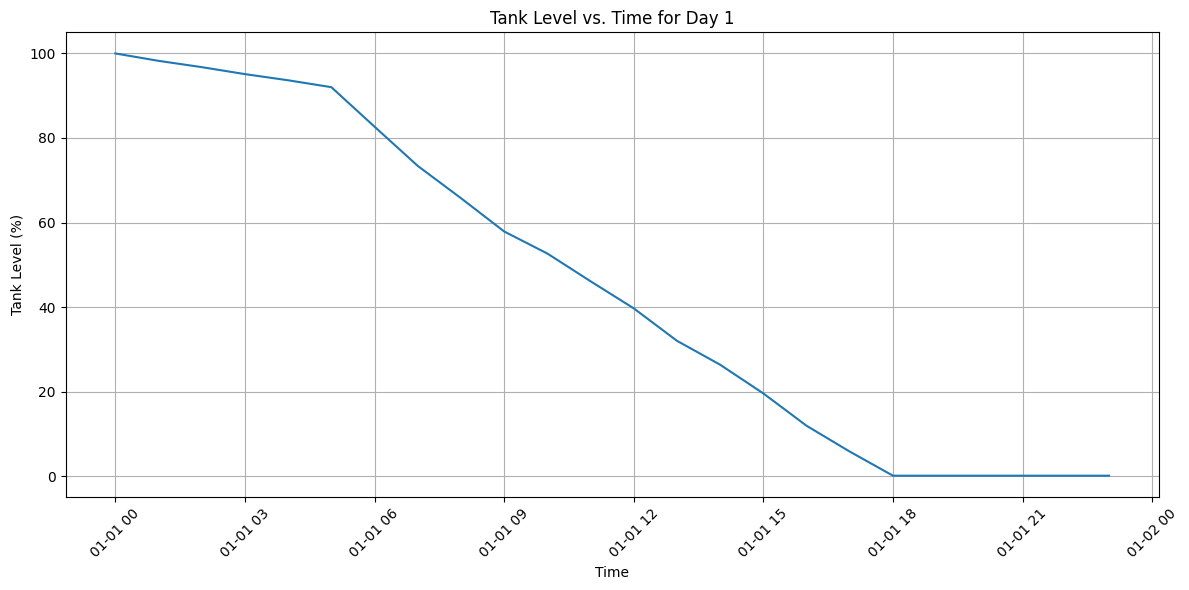

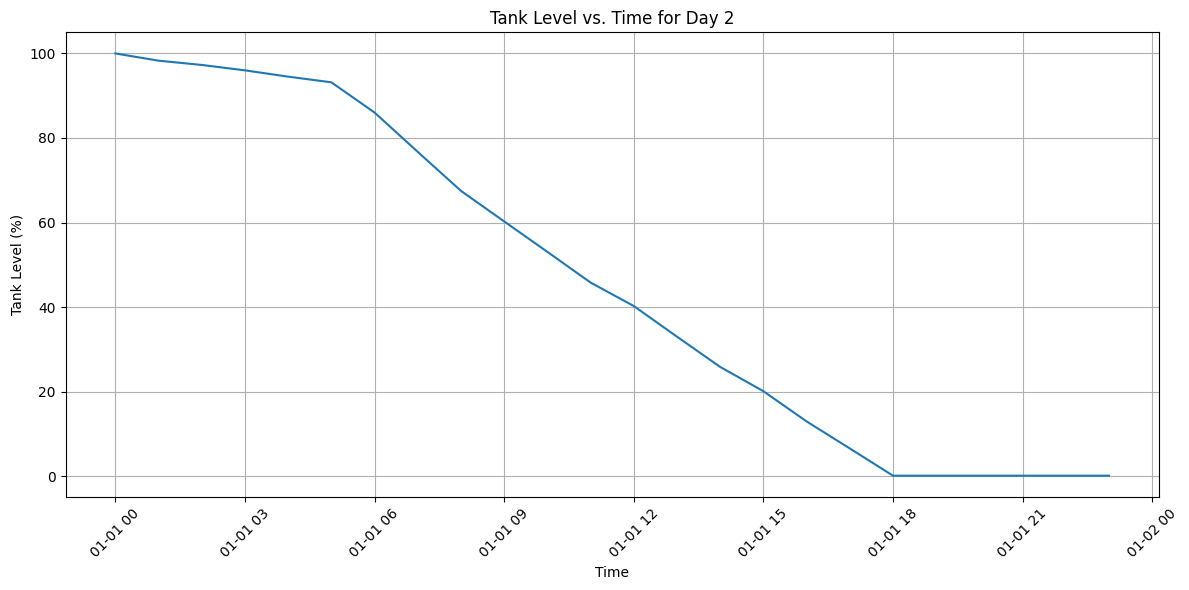

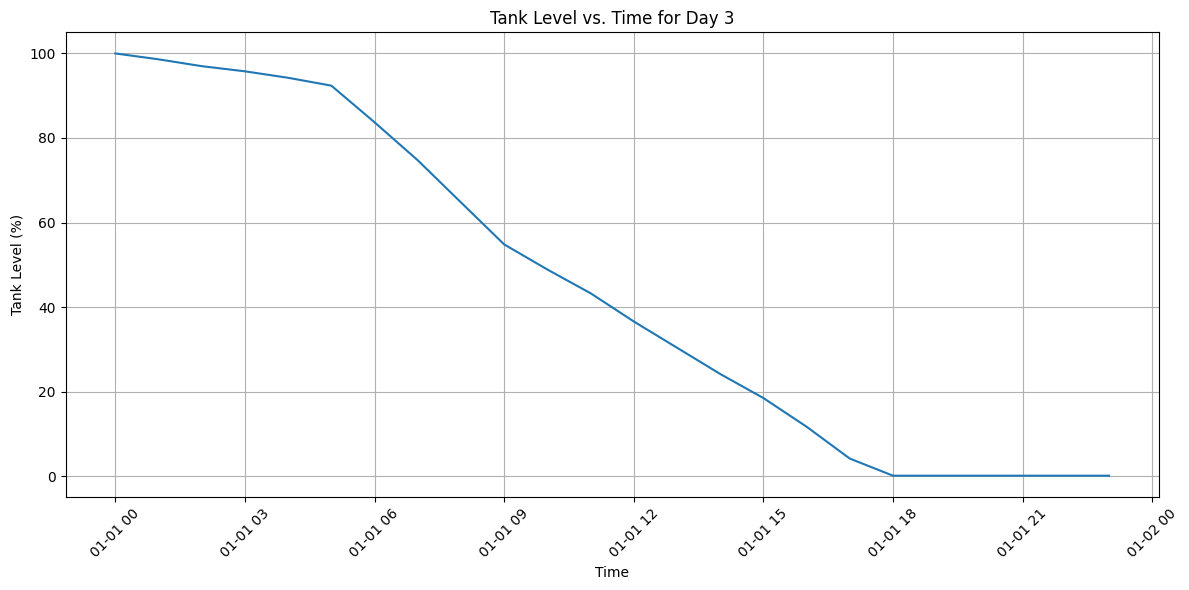

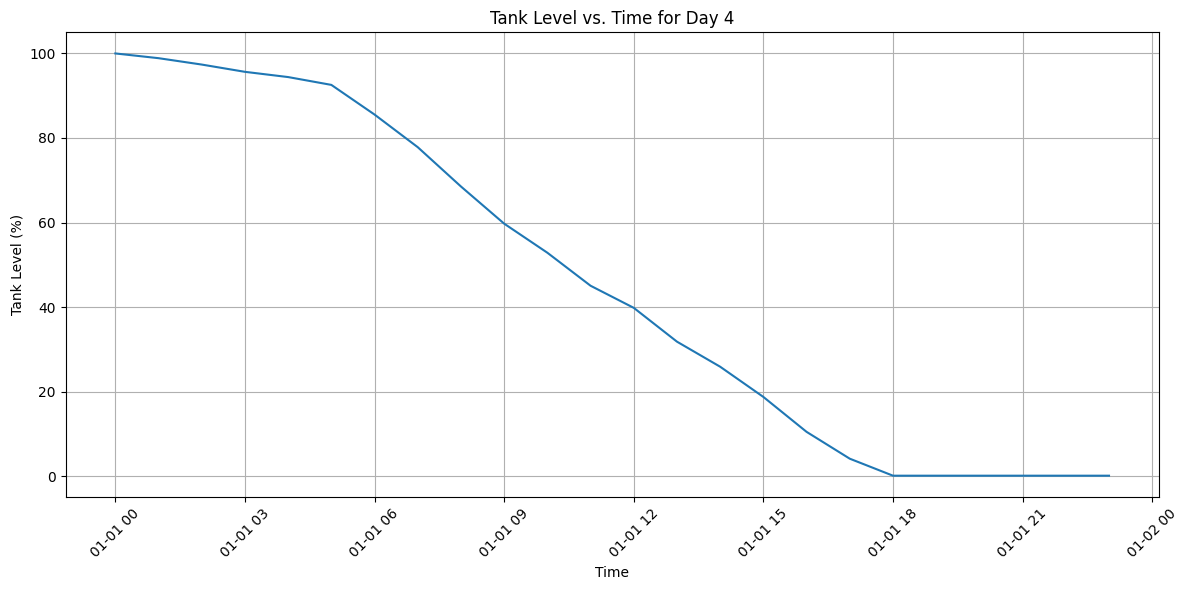

KeyboardInterrupt: 

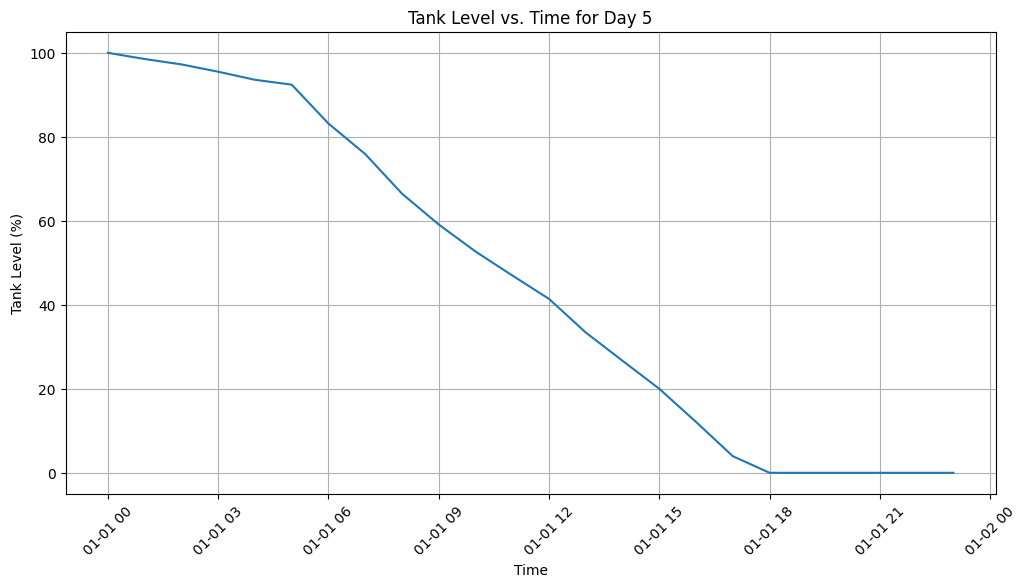

In [106]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

tank_levels_data = []

with open('usage_pattern_365_days_2.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        tank_levels_data.append(row)

for record in tank_levels_data:
    record['Level'] = float(record['Level'])
    record['Time'] = datetime.strptime(record['Time'], '%H:%M')

day_data = {}

for record in tank_levels_data:
    day = int(record['Day'])
    if day not in day_data:
        day_data[day] = {'Time': [], 'Level': []}
    day_data[day]['Time'].append(record['Time'])
    day_data[day]['Level'].append(record['Level'])

for day in range(1, 6):
    data = day_data[day]
    plt.figure(figsize=(12, 6))
    plt.plot(data['Time'], data['Level'])
    plt.xlabel('Time')
    plt.ylabel('Tank Level (%)')
    plt.title(f'Tank Level vs. Time for Day {day}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import csv
import random

num_days = 365
num_hours = 24
highest_level = 100.0
lowest_level = 0.1 

tank_levels_dataset = []

for day in range(1, num_days + 1):
    daily_levels = [highest_level]
    for hour in range(1, num_hours):
        if 6 <= hour < 10:
            decrease_factor = random.uniform(6.0, 9.0)
        elif 10 <= hour < 16:
            decrease_factor = random.uniform(4.0, 6.0)
        elif 16 <= hour < 20:
            decrease_factor = random.uniform(6.0, 9.0)
        else:
            decrease_factor = random.uniform(1.0, 2.0)
        tank_level = max(daily_levels[-1] - decrease_factor, lowest_level)
        daily_levels.append(round(tank_level, 2))
    tank_levels_dataset.append([day] + daily_levels)

with open('usage_pattern_365_days_updated.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    header = ['Day'] + [f'Hour_{hour}' for hour in range(24)]
    writer.writerow(header)
    writer.writerows(tank_levels_dataset)


In [ ]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('usage_pattern_365_days_updated.csv')  # Modify the filename accordingly

# Extract relevant columns (Day and Hour_0 to Hour_23)
df_diff = df[['Day'] + [f'Hour_{hour}' for hour in range(24)]]

# Calculate the differences between current level and previous level for each hour
for hour in range(1, 24):
    df_diff[f'Diff_Hour_{hour}'] = df[f'Hour_{hour}'] - df[f'Hour_{hour-1}']

# Remove the first hour difference columns (since there's no previous hour)
# df_diff = df_diff.drop(columns=['Diff_Hour_0'])

# Save the dataset with differences to a new CSV file
df_diff.to_csv('level_differences.csv', index=False)


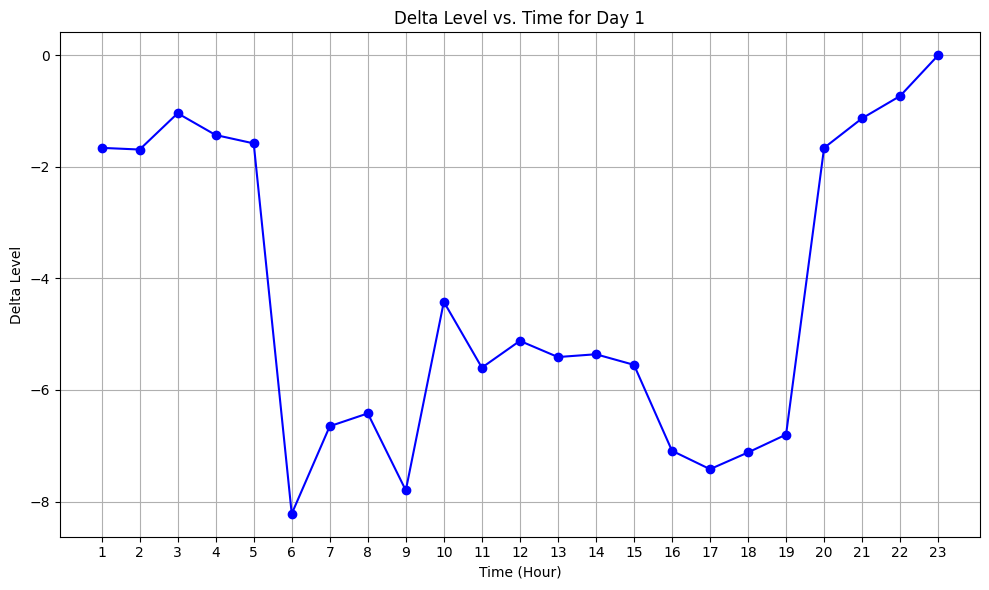

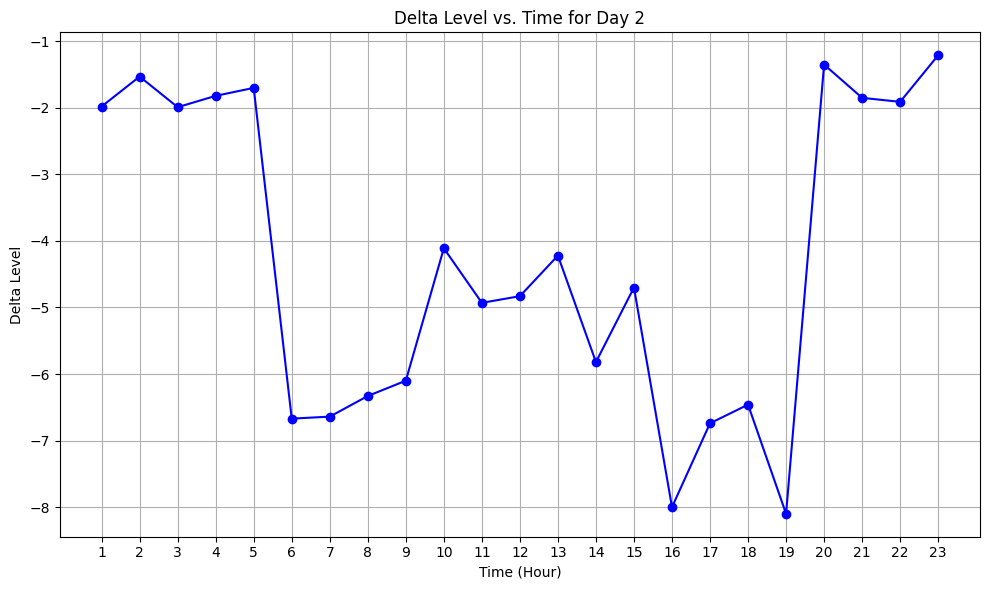

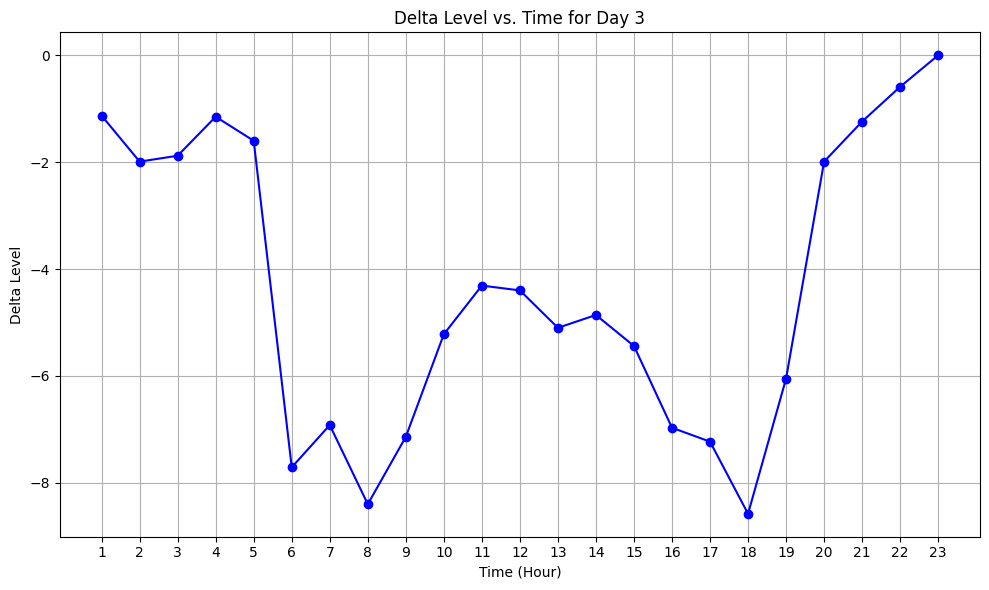

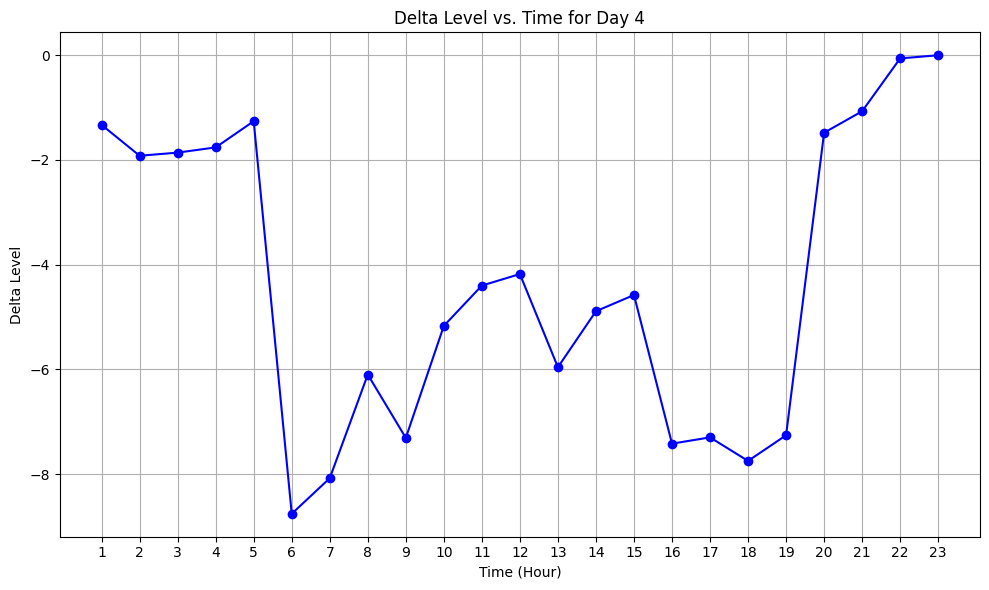

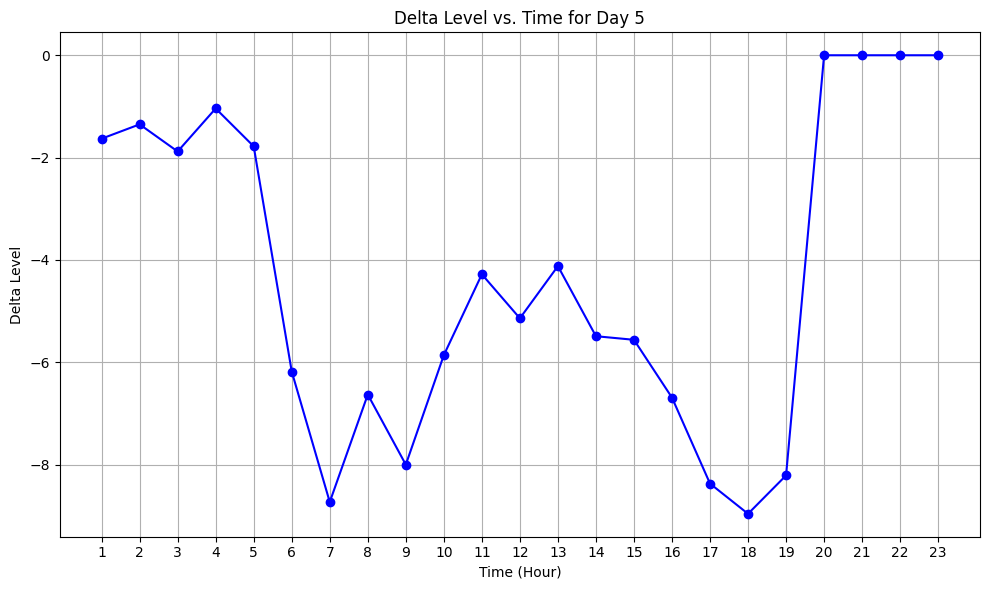

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with level differences
df_diff = pd.read_csv('level_differences.csv')  # Modify the filename accordingly

# Get the time columns (Hour_1 to Hour_23)
time_columns = [f'{hour}' for hour in range(1, 24)]

# Iterate through the first five days and plot the data
for day in range(1, 6):
    # Extract data for the current day
    day_data = df_diff[df_diff['Day'] == day]

    # Plot the data points vs. time for the current day
    plt.figure(figsize=(10, 6))
    plt.plot(time_columns, day_data.iloc[0, 1:], marker='o', color='b')
    plt.xlabel('Time (Hour)')
    plt.ylabel('Delta Level')
    plt.title(f'Delta Level vs. Time for Day {day}')
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()


(365, 23)


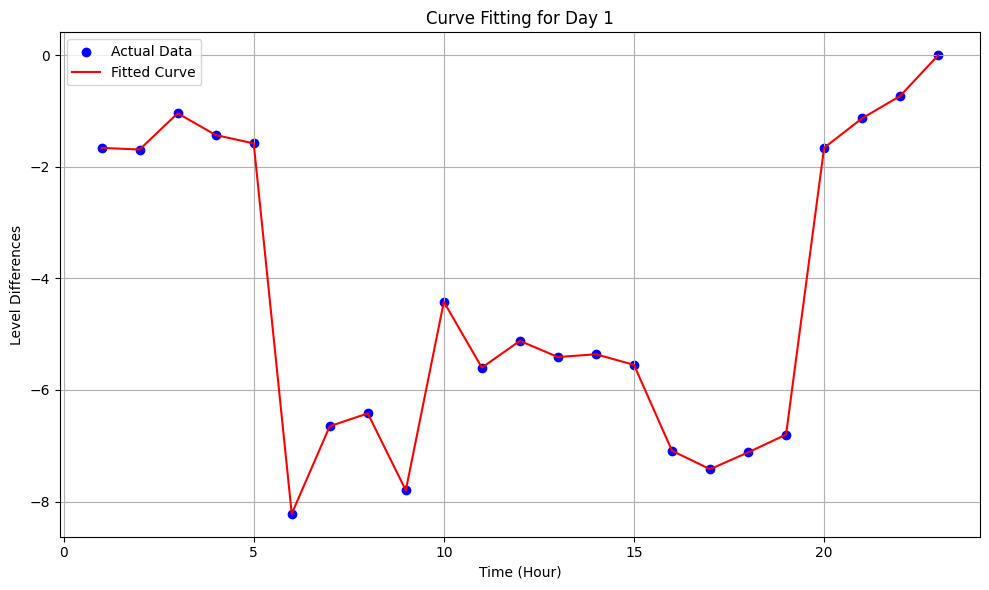

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load the dataset with level differences
df_diff = pd.read_csv('level_differences.csv')  # Modify the filename accordingly

# Get the time columns (Hour_1 to Hour_23)
time_columns = [f'Hour_{hour}' for hour in range(1, 24)]

# Prepare the features (time) and target (level differences)
X = np.array(df_diff[time_columns])
y = np.array(df_diff.iloc[:, 1:])


# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can adjust the degree of the polynomial
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict level differences using the model
y_pred = model.predict(X_poly)

# Plot the curve fitting for a specific day (e.g., first day)
day_data = df_diff[df_diff['Day'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(range(1, 24), day_data.iloc[0, 1:], color='blue', label='Actual Data')
plt.plot(range(1, 24), y_pred[day_data.index[0]], color='red', label='Fitted Curve')
plt.xlabel('Time (Hour)')
plt.ylabel('Level Differences')
plt.title('Curve Fitting for Day 1')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


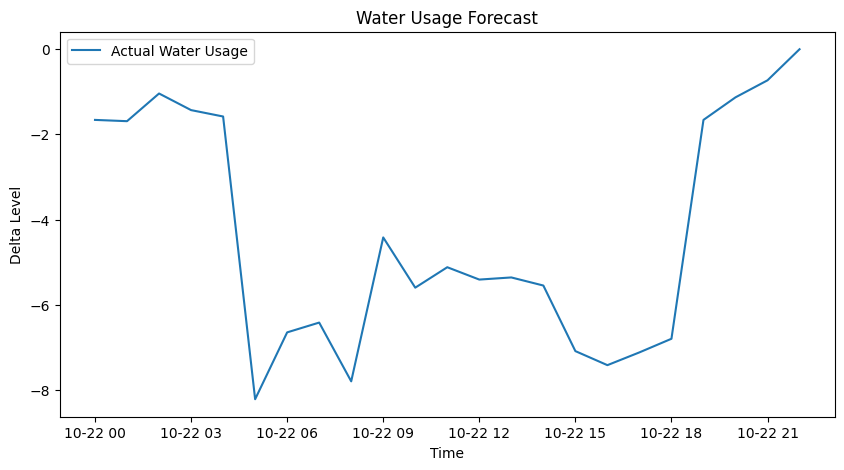

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

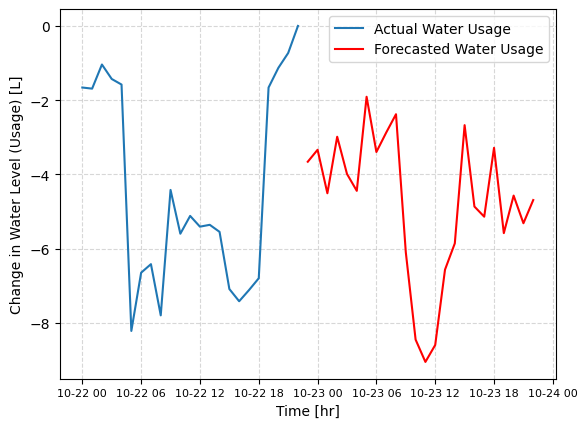

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

diffData = pd.read_csv("level_differences.csv")
a = np.array(diffData.iloc[:, 1:])
y = a[0]

time_index = pd.date_range(start='2023-10-22', periods=23, freq='H')

df = pd.DataFrame({'Time': time_index, 'Water_Usage': y})

df.set_index('Time', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Water_Usage'], label='Actual Water Usage')
plt.title('Water Usage Forecast')
plt.xlabel('Time')
plt.ylabel('Delta Level')
plt.legend()
plt.show()

model = ARIMA(df['Water_Usage'], order=(15, 1, 2))
results = model.fit()

forecast_steps = 24
forecast = results.forecast(steps=forecast_steps)
forecast_dates = [df.index[-1] + pd.DateOffset(hours=i) for i in range(1, forecast_steps+1)]

# plt.figure(figsize=(10, 5))
plt.tick_params(axis='x', labelsize=8)
plt.plot(df.index, df['Water_Usage'], label='Actual Water Usage')
plt.plot(forecast_dates, forecast, label='Forecasted Water Usage', color='red')
# plt.title('Water Usage Forecast')
plt.xlabel('Time [hr]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('Change in Water Level (Usage) [L]')
plt.legend()
plt.show()


In [3]:
import pandas as pd

def predictWaterLevel(currLevel, currTime):
    nextFiveHours = []

    df = pd.read_csv('level_differences.csv')
    for i in range(currTime+1, currTime+6):
        column_name = f'Hour_'+str(i)
        average = df[column_name][-30:].mean()
        nextFiveHours.append(currLevel+average)
        currLevel+=average

    print(nextFiveHours)
    


predictWaterLevel(60, 7)

[52.68533333333333, 45.092666666666666, 40.02466666666667, 34.90833333333333, 29.830999999999996]


Hour: 0 :: [98.477, 97.05066666666667, 95.65066666666667, 94.15866666666666, 92.67466666666667]
5.7
5.2
4.8
4.9
5.6
Hour: 1 :: [97.53366666666666, 96.13366666666666, 94.64166666666665, 93.15766666666666, 85.79066666666665]
5.2
4.8
4.9
5.6
7.3
Hour: 2 :: [95.89999999999999, 94.40799999999999, 92.92399999999999, 85.55699999999999, 77.96066666666665]
4.8
4.9
5.6
7.3
7.6
Hour: 3 :: [94.118, 92.634, 85.267, 77.67066666666666, 70.356]
4.9
5.6
7.3
7.6
7.2
Hour: 4 :: [93.086, 85.719, 78.12266666666666, 70.80799999999999, 63.21533333333333]
5.6
7.3
7.6
7.2
7.7
Hour: 5 :: [85.77299999999998, 78.17666666666665, 70.86199999999998, 63.269333333333314, 58.20133333333332]
7.3
7.6
7.2
7.7
7.4
Hour: 6 :: [83.96366666666665, 76.64899999999999, 69.05633333333331, 63.988333333333316, 58.871999999999986]
7.6
7.2
7.7
7.4
7.1
Hour: 7 :: [76.02533333333332, 68.43266666666665, 63.36466666666665, 58.24833333333332, 53.170999999999985]
7.2
7.7
7.4
7.1
7.5
Hour: 8 :: [69.09733333333331, 64.02933333333331, 58.9129

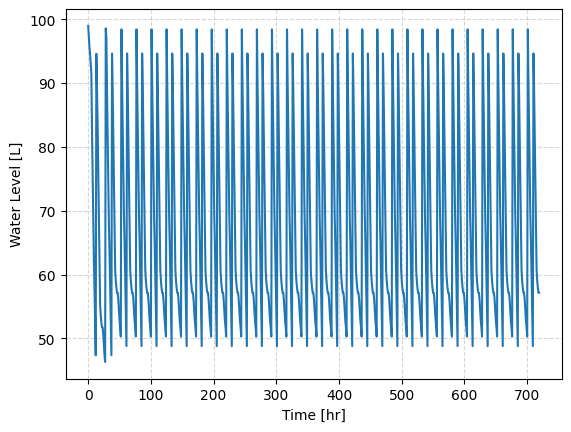

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

def refillTank():
    return 100

def predictWaterLevel(currLevel, currTime):
    nextFiveHours = []

    df = pd.read_csv('level_differences.csv')
    for i in range(currTime+1, currTime+6):
        column_name = f'Hour_'+str(i%24)
        average = df[column_name][-30:].mean()
        nextFiveHours.append(currLevel+average)
        currLevel+=average

    return nextFiveHours


level = 100
levelList = []

threeDayUsage = pd.read_csv('level_differences.csv')
threeDayUsage = threeDayUsage.iloc[0, 1:].tolist()

elecCost = pd.read_csv('electricity_prices.csv')
elecCost = elecCost.drop('Time', axis=1)
elecCost = elecCost['Price'].tolist()

sumCost = 0

for i in range(0, 720):
    tempNextFive = predictWaterLevel(level, i%24)
    print(f"Hour: {i} :: {tempNextFive}")
    
    for j in range(0, 5):
        minCost = sys.maxsize
        print(f"{elecCost[(i+j)%24]}")
        if(tempNextFive[j]<=20):
            for k in range(i%24, (i+j+1)%24):
                if(elecCost[k]<minCost):
                    minCost = elecCost[k]
                    refillHour = k
            level = refillTank()
            print(f"Tank Refilled!!, {refillHour}")
            sumCost += minCost
            break
    
    level += threeDayUsage[i%24]
    levelList.append(level)

print(sumCost)
plt.plot(levelList)

plt.xlabel('Time [hr]')
plt.ylabel('Water Level [L]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(True)

plt.show()


429.0


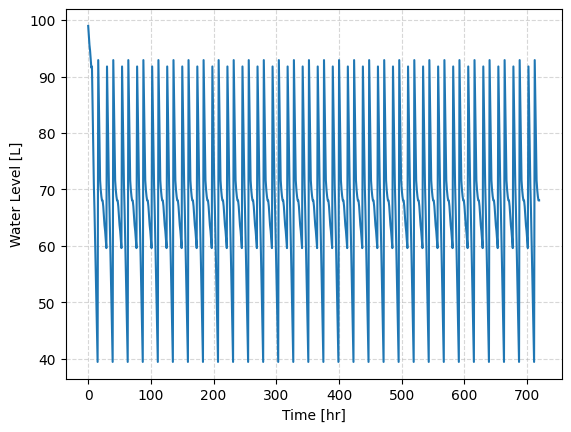

In [18]:
import pandas as pd
import sys

def refillTank():
    return 100

level = 100
levelList = []

threeDayUsage = pd.read_csv('level_differences.csv')
threeDayUsage = threeDayUsage.iloc[0, 1:].tolist()

elecCost = pd.read_csv('electricity_prices.csv')
elecCost = elecCost.drop('Time', axis=1)
elecCost = elecCost['Price'].tolist()

sumCost = 0

for i in range(0, 720):
    
    if(i%24 == 6):
        level = refillTank()
        sumCost+=elecCost[6]
    elif(i%24 == 16):
        level = refillTank()
        sumCost+=elecCost[16]
    
    level += threeDayUsage[i%24]
    levelList.append(level)

print(sumCost)

import matplotlib.pyplot as plt
plt.plot(levelList)

plt.xlabel('Time [hr]')
plt.ylabel('Water Level [L]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(True)
# plt.title('Water Level vs Time')

plt.show()


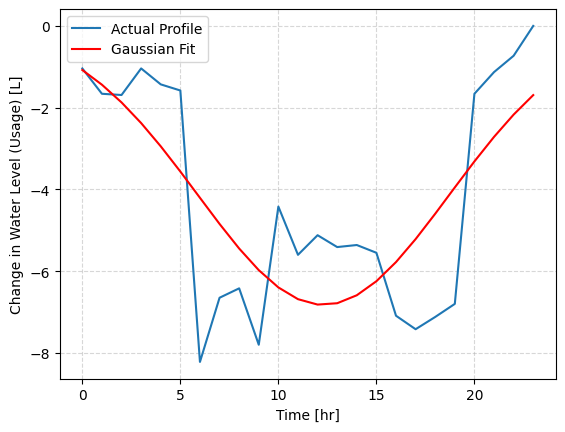

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

time = np.arange(0, 24, 1)
threeDayUsage = pd.read_csv('level_differences.csv')
data = threeDayUsage.iloc[0, 1:].tolist()


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)

initial_guess = [1, np.mean(data), np.std(data)]
fit_params, covariance = curve_fit(gaussian, time, data, p0=initial_guess)

amplitude_fit, mean_fit, stddev_fit = fit_params
data_fit = gaussian(time, amplitude_fit, mean_fit, stddev_fit)

plt.plot(time, data, label='Actual Profile')
plt.plot(time, data_fit, color='red', label='Gaussian Fit')
plt.legend()
# plt.title('Gaussian Curve Fitting for Time-Series Data')
plt.xlabel('Time [hr]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('Change in Water Level (Usage) [L]')
plt.show()


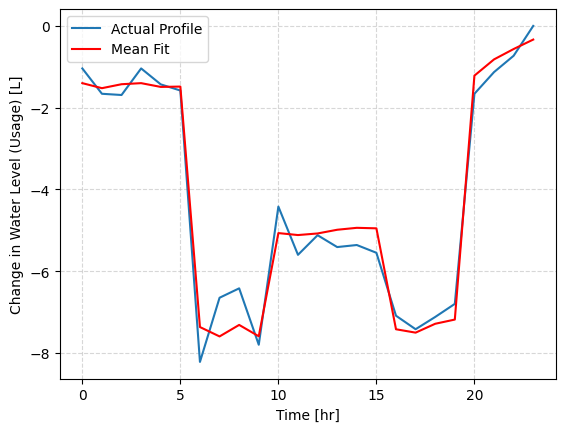

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def predictWaterLevel(currTime):
    nextDay = []

    df = pd.read_csv('level_differences.csv')
    for i in range(currTime, currTime+24):
        column_name = f'Hour_'+str(i%24)
        average = df[column_name][-30:].mean()
        nextDay.append(average)

    return nextDay

time = np.arange(0, 24, 1)
threeDayUsage = pd.read_csv('level_differences.csv')
data = threeDayUsage.iloc[0, 1:].tolist()
predictedData = predictWaterLevel(0)

plt.plot(time, data, label='Actual Profile')
plt.plot(time, predictedData, color='red', label='Mean Fit')
plt.legend()
# plt.title('Mean based Prediction')
plt.xlabel('Time [hr]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('Change in Water Level (Usage) [L]')
plt.show()


215.9999999999999


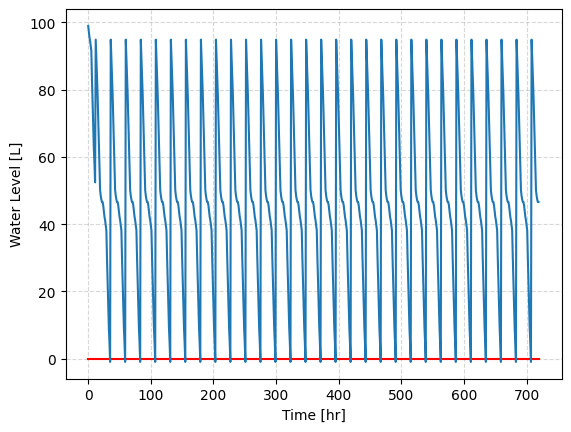

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

def refillTank():
    return 100

level = 100
levelList = []

threeDayUsage = pd.read_csv('level_differences.csv')
threeDayUsage = threeDayUsage.iloc[0, 1:].tolist()

elecCost = pd.read_csv('electricity_prices.csv')
elecCost = elecCost.drop('Time', axis=1)
elecCost = elecCost['Price'].tolist()

sumCost = 0

for i in range(0, 720):
    
    if(i%24 == 12):
        level = refillTank()
        sumCost+=elecCost[12]
    
    level += threeDayUsage[i%24]
    levelList.append(level)

print(sumCost)

import numpy as np

zeroX = np.linspace(0, 720, 100)
zeroY = np.zeros_like(zeroX)
plt.plot(zeroX, zeroY, color='red')

plt.plot(levelList)

plt.xlabel('Time [hr]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('Water Level [L]')
# plt.title('Water Level vs Time')

plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


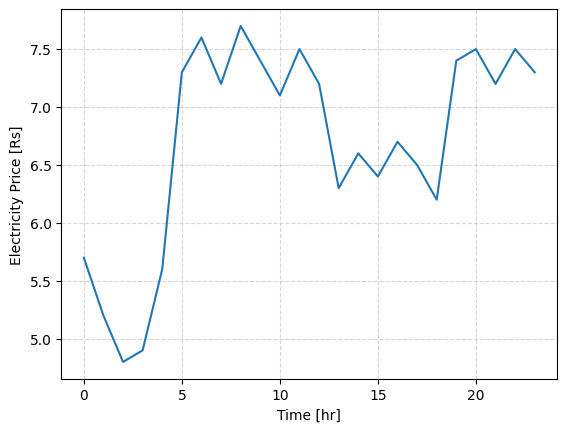

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

elecPrice = pd.read_csv('electricity_prices.csv')
elecCost = elecPrice['Price'].tolist()
timeFrame = list(range(0, 24, 1))
print(timeFrame)
plt.plot(timeFrame, elecCost, label='Electricity Prices')

plt.xlabel('Time [hr]')
plt.ylabel('Electricity Price [Rs]')
# plt.title('Electricity Prices Over Time')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
